# My First Multiple Linear Regression Model

### Importing the Libraries

In [32]:
import matplotlib.pyplot as plt
import pandas 
import pylab as pl
import numpy 
%matplotlib inline

### Reading the File

In [33]:
readFile = pandas.read_csv("FuelConsumptionCo2.csv")

### Checking if Dataset Imported Properly

In [35]:
readFile.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


### Selecting our Required Columns

In [90]:
readCertainCols = readFile[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
readCertainCols.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244


### Plotting to Visualise Linearity

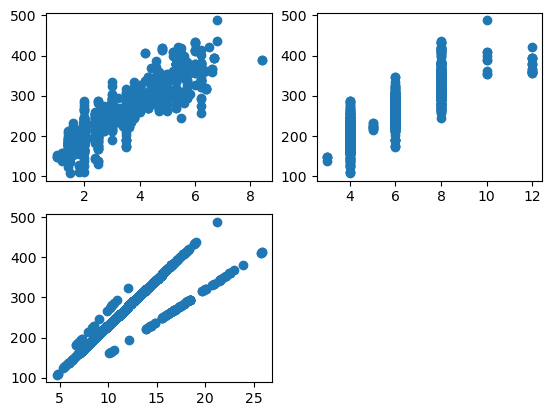

In [89]:
plt.subplot(2, 2, 1)
plt.scatter(readCertainCols['ENGINESIZE'], readCertainCols['CO2EMISSIONS'])
plt.subplot(2, 2, 2)
plt.scatter(readCertainCols['CYLINDERS'], readCertainCols['CO2EMISSIONS'])
plt.subplot(2, 2, 3)
plt.scatter(readCertainCols['FUELCONSUMPTION_COMB'], readCertainCols['CO2EMISSIONS'])
plt.show()

### Defining X and Y

In [100]:
x = readCertainCols.drop(['CO2EMISSIONS', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_CITY'], axis=1)
y = readCertainCols['CO2EMISSIONS']

print(x)
print(y)

      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_COMB
0            2.0          4                   8.5
1            2.4          4                   9.6
2            1.5          4                   5.9
3            3.5          6                  11.1
4            3.5          6                  10.6
...          ...        ...                   ...
1062         3.0          6                  11.8
1063         3.2          6                  11.5
1064         3.0          6                  11.8
1065         3.2          6                  11.3
1066         3.2          6                  12.8

[1067 rows x 3 columns]
0       196
1       221
2       136
3       255
4       244
       ... 
1062    271
1063    264
1064    271
1065    260
1066    294
Name: CO2EMISSIONS, Length: 1067, dtype: int64


### Making Train/Test Datasets

In [101]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

### Training Model on Training Set

In [102]:
from sklearn.linear_model import LinearRegression

ml = LinearRegression().fit(x_train, y_train)

print ('Coefficients: ', ml.coef_)
print ('Coefficients: ', ml.intercept_)

Coefficients:  [11.98993058  7.54469599  8.98695981]
Coefficients:  69.05220992553797


### Comparing Predicted Values to Actual Values

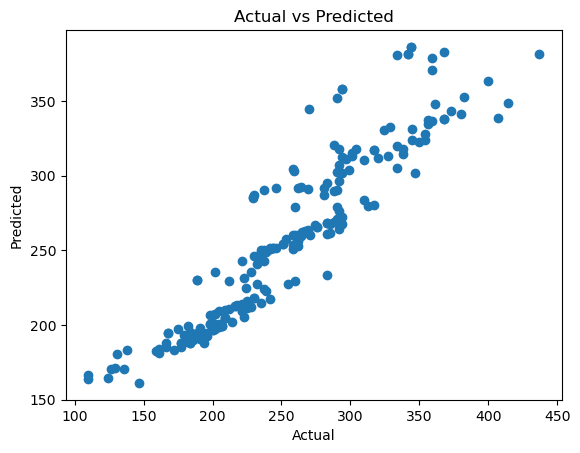

In [103]:
y_pred = ml.predict(x_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

### Calculating R2 Score

In [104]:
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.8604199405627128

### Calculating MSE

In [105]:
mse = numpy.mean((y_pred - y_test) ** 2)
print("Mean Squared Error (MSE): " + '%.2f' % mse)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % ml.score(x, y))

Mean Squared Error (MSE): 589.24
Variance score: 0.86


# Training on Different Variables

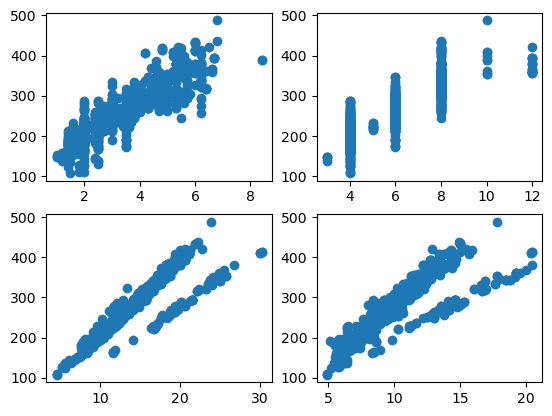

In [106]:
plt.subplot(2, 2, 1)
plt.scatter(readCertainCols['ENGINESIZE'], readCertainCols['CO2EMISSIONS'])
plt.subplot(2, 2, 2)
plt.scatter(readCertainCols['CYLINDERS'], readCertainCols['CO2EMISSIONS'])
plt.subplot(2, 2, 3)
plt.scatter(readCertainCols['FUELCONSUMPTION_CITY'], readCertainCols['CO2EMISSIONS'])
plt.subplot(2, 2, 4)
plt.scatter(readCertainCols['FUELCONSUMPTION_HWY'], readCertainCols['CO2EMISSIONS'])
plt.show()

In [109]:
x = readCertainCols.drop(['CO2EMISSIONS', 'FUELCONSUMPTION_COMB'], axis=1)
y = readCertainCols['CO2EMISSIONS']

print(x)
print(y)

      ENGINESIZE  CYLINDERS  FUELCONSUMPTION_CITY  FUELCONSUMPTION_HWY
0            2.0          4                   9.9                  6.7
1            2.4          4                  11.2                  7.7
2            1.5          4                   6.0                  5.8
3            3.5          6                  12.7                  9.1
4            3.5          6                  12.1                  8.7
...          ...        ...                   ...                  ...
1062         3.0          6                  13.4                  9.8
1063         3.2          6                  13.2                  9.5
1064         3.0          6                  13.4                  9.8
1065         3.2          6                  12.9                  9.3
1066         3.2          6                  14.9                 10.2

[1067 rows x 4 columns]
0       196
1       221
2       136
3       255
4       244
       ... 
1062    271
1063    264
1064    271
1065    260
106

In [110]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [111]:
ml = LinearRegression().fit(x_train, y_train)

print ('Coefficients: ', ml.coef_)
print ('Coefficients: ', ml.intercept_)

Coefficients:  [11.99897826  7.61636533  4.7423976   4.29566523]
Coefficients:  68.93070802166534


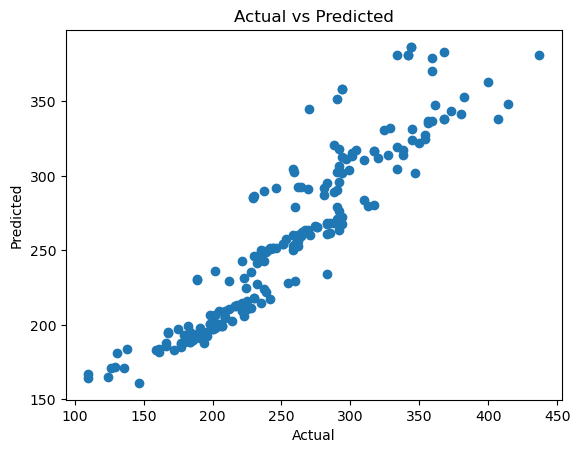

In [112]:
y_pred = ml.predict(x_test)

plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [113]:
r2_score(y_test, y_pred)

0.8599443136450631

In [114]:
mse = numpy.mean((y_pred - y_test) ** 2)
print("Mean Squared Error (MSE): " + '%.2f' % mse)

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % ml.score(x, y))

Mean Squared Error (MSE): 591.24
Variance score: 0.86


# Conclusion

The R2 score is higher and MSE is lower when training the data on ENGINESIZE, CYLINDERS, and FUELCONSUMPTION_COMB